## Лабораторная работа

### Задание 1. Изменение размеров изображения (Image Scaling)

Задача изменения размера изображения может быть рассмотрена как задача интерполяции, т.е. задача восстановления значений функции в заданных точках по известным значениям функции на некоторой сетке.

Для восстановления значения функции в методе ближайшего соседа (Nearest-neighbor interpolation) используется значение функции в точке наиболее близкой к заданной.

Реализуйте функцию `resize`, изменяющую размер изображения с помощью интерполяции методом ближайшего соседа.

Продемонстрируйте работу функции на любимых изображениях.

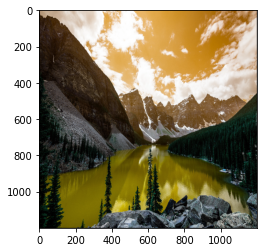

In [15]:
import numpy as np

from typing import Tuple
from numpy.typing import ArrayLike
import cv2
import matplotlib.pyplot as plt 
import math

# image = cv2.resize(image, (int(w / 1.4), int(h / 1.4)), cv2.INTER_NEAREST)

def resize(image: ArrayLike, shape: Tuple[int, int]) -> ArrayLike:
  if len(image.shape)==2:
        height, width=image.shape
        image_new=np.zeros((shape[0], shape[1]), dtype=np.uint8)
  else:
        height, width, _=image.shape
        image_new=np.zeros((shape[0], shape[1], _), dtype=np.uint8)
  for i in range(shape[0]-1):
    for j in range(shape[1]-1):
            image_new[i, j]=image[round(i*(height/shape[0])), round(j*(width/shape[1]))]
  return image_new

image = cv2.imread('/content/Canada_Parks_Lake_Mountains_Forests_Scenery_Rocky_567540_3840x2400.jpg')

plt.imshow(resize(image, (1200, 1200)))



### Задание 2. Подавление шума с помощью усреднения (Image Denoising by Averaging)

[Дано](https://drive.google.com/drive/folders/1Q4tnIrZgyJJWiyUWHrfA1ZF8_oQFXmJX?usp=sharing) 100 совмещенных цифровых фотоснимков Малого Магелланова
облака с визуальным шумом.

- Используя метод усреднения выборки цифровых
изображений, подавить шум и увеличить соотношение сигнал-шум.

- При каких допущениях метод усреднения применим? Приведите выкладки.

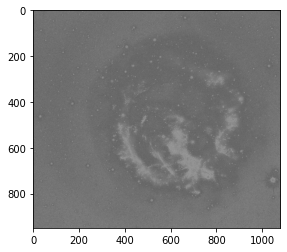

In [17]:
from pylab import *
from numpy import*
import os
 
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]
    #files = os.listdir(path)
    #images = filter(lambda x: x.endswith('.jpg'), files)
    #return files

def compute_average(imlist):
    averageim = array(cv2.imread(imlist[0]), 'f')
    for imname in imlist[1:]:
        try:
            averageim += array(cv2.imread(imname))
        except:
            print(imname + '...skipped')
    averageim /= 100
    return array(averageim, 'uint8')
 
imlist = get_imlist("/content/drive/MyDrive/image-denoising-by-averaging")
im_a = compute_average(imlist)

plt.imshow(im_a)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Дисперсия описывает, насколько отклонение случайной величины отличается от математических ожиданий. (Случайные переменные можно рассматривать как случайные пиксели) -> чем меньше дисперсия, тем стабильнее изображение.

Применимость метода следует из ЦПТ(центральная предельная теорема): устанавливает, что во многих ситуациях, когда суммируются независимые случайные величины, их должным образом нормализованная сумма стремится к нормальному распределению, даже если сами исходные переменные не распределены нормально. 

Классическая центральная предельная теорема утверждает, что сумма n независимых одинаково распределённых случайных величин имеет распределение, близкое к N(mu ,sigma ^2). Эквивалентно, X_n имеет распределение близкое к N(mu ,sigma^2/n).